Simulations to better understand type I and type II errors.

Here:

**alpha**($\alpha$) : it is the probability of rejecting the null hypothesis given that it is true (i.e type I error rate or significance level)

Usually, alpha is set to 0.05 (5%), implying that there is a 5% chance that asignificant difference is actually due to chance and not due to true difference.

**beta**($\beta$) : it is the rate of type II error and is related to the power of a test (1-beta)

Generally, we use a beta cut-off of 20% (0.2), indicating a 20% chance that a significant difference is missed.

To simulate the two errors, let's first import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import random

# for visualization
import seaborn as sns
sns.set(color_codes=True)

float64


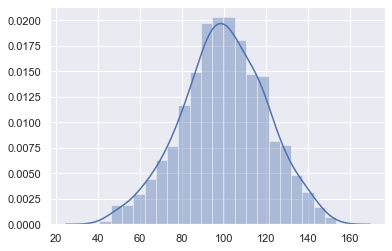

In [2]:
# create a population with a mean of 100, a standard deviation of 20, and a size of 1000 elements

pop = np.random.normal(100, 20, 1000)
print(pop.dtype)
sns.distplot(pop)

In [3]:
# Taking two samples of size=100 from this population. 

sample1 = np.random.choice(pop, 100, replace=True)
print("Sample 1 Summary\n")
print(stats.describe(sample1))

sample2 =np.random.choice(pop, 100, replace=True)
print("\nSample 2 Summary\n")
print(stats.describe(sample2))

# Here, we sample with replacement to ensure the independence assumption between the elements of these samples.

Sample 1 Summary

DescribeResult(nobs=100, minmax=(46.94534601497399, 143.93295406288536), mean=99.57606015641836, variance=375.76983561138104, skewness=-0.34228576438432035, kurtosis=-0.2256658480480116)

Sample 2 Summary

DescribeResult(nobs=100, minmax=(48.35866396442442, 138.5869376435438), mean=100.28576179310151, variance=371.809942163929, skewness=-0.20476180552278053, kurtosis=-0.08231623911021257)


Ttest_indResult(statistic=-0.2595655396109321, pvalue=0.7954686068170442) 



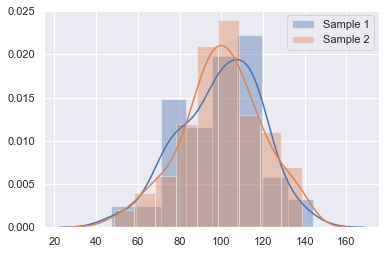

In [4]:
# Testing the sample means
print(stats.ttest_ind(sample1, sample2),"\n")

plt.figure("Test Samples")
sns.distplot(sample1, label='Sample 1')
sns.distplot(sample2, label="Sample 2")
plt.legend()
plt.show()

In this case, the null hypothesis is that the two samples come from the same population.

In t-test, the statistic value (or t-value) is the ratio of the departure of the estimated value from its hypothesized value to its standard error. It is used to determine if the null hypothesis should be accepted or rejected.

A t-value of 0 indicates that the sample results exactly match the null hypothesis. As the difference between the data and the null hypothesis increases, the absolute value of the t-value increases (significant when greater than 2)

Also, the p-value is used here to determine the probability of observing a more extreme test statistic in the direction of the alternative hypothesis than the one observed. (Kind of like determining "If the defendant is innocent, what is the chance that we'd observe such extreme criminal evidence?")

If the p-value is less than (or equal to) $\alpha$, then the null hypothesis is rejected in favor of the alternative hypotheis. 

Considering we set $\alpha$=0.05 and p-value > $\alpha$, we accept the null hypothesis that the two samples came from the same population.

To understand the significance of alpha in reaching this conclusion and avoiding type I or type II errors, we do further analysis with regard to each error, as shown below:

In [5]:
def type_1_error(pop, num_tests, alphas):
    """
    Repeatedly take two random samples from the same population and run independent t-tests to check for False Positives (i.e incorrectly rejecting the null hypothesis)
    Parameters:
            pop: the population of elements with a random normal distribution, a numpy array.
            num_tests: the number of hypothesis tests to compute, a scalar int.
            alphas: a list of the alpha levels at which it is tested, a 1-D list.
    Returns:
            sig_tests: a dataframe with columns 'type_1_error' (a boolean to indicate if the null hypothesis was incorrectly rejected), 'p_value' and its corresponding 'alpha'.
    """
    error_array =[]
    p_value_array = []
    alpha_array =[]
    for hyp_test in range(num_tests):
        sample1 = np.random.choice(pop, 100, replace=True)
        sample2 = np.random.choice(pop, 100, replace=True)
        p_value = stats.ttest_ind(sample1, sample2)[1]
        for alpha_i in alphas:
            p_value_array.append(p_value)
            alpha_array.append(alpha_i)
            if alpha_i > p_value:
                # hypothesis is incorrectly rejected
                error_array.append(True) 
            else:
                error_array.append(False)
    sig_tests = pd.DataFrame.from_dict({'type_1_error':error_array,'p_value':p_value_array,'alpha':alpha_array})
    return sig_tests

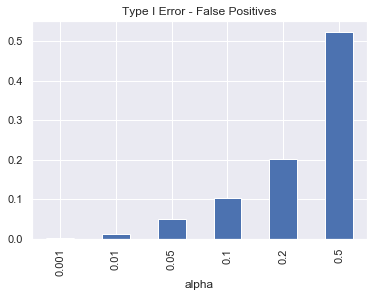

In [6]:
pop = np.random.normal(100, 20, 1000)
num_tests = 1000
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
sig_tests_1 = type_1_error(pop, num_tests, alpha_set)
# to sum the errors for each level of alpha
group_error = (sig_tests_1.groupby('alpha')['type_1_error'].sum())/num_tests
group_error.plot.bar(title='Type I Error - False Positives')

From the graph, it is clear that as the value of alpha increases, there is a higher probability of observing type I errors.

In [7]:
# for type II errors, we check using samples from two different populations.
def type_2_error(pop, pop_2, num_tests, alphas):
    """
    Repeatedly take two random samples from two different population groups and run independent t-tests to check for False Negatives (i.e incorrectly accepting the null hypothesis)
    Parameters:
            pop: the population of elements with a random normal distribution, a numpy array.
            pop_2: another population with a rando normal distribution but with a different mean, a numpy array
            num_tests: the number of hypothesis tests to compute, a scalar int.
            alphas: a list of the alpha levels at which it is tested, a 1-D list.
    Returns:
            sig_tests: a dataframe with columns 'type_2_error' (a boolean to indicate if the null hypothesis was incorrectly accepted), 'p_value' and its corresponding 'alpha'.
    """
    error_array =[]
    p_value_array = []
    alpha_array =[]
    for hyp_test in range(num_tests):
        sample1 = np.random.choice(pop, 100, replace=True)
        sample2 = np.random.choice(pop_2, 100, replace=True)
        p_value = stats.ttest_ind(sample1, sample2)[1]
        for alpha_i in alphas:
            p_value_array.append(p_value)
            alpha_array.append(alpha_i)
            if alpha_i < p_value:
                # null hypothesis is incorrectly accepted
                error_array.append(True)
            else:
                error_array.append(False)
    sig_tests = pd.DataFrame.from_dict({'type_2_error':error_array,'p_value':p_value_array,'alpha':alpha_array})
    return sig_tests

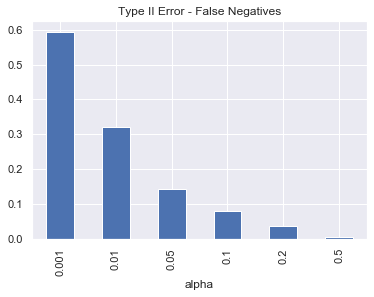

In [8]:
pop = np.random.normal(100, 20, 1000)
pop_2 = np.random.normal(110, 20, 1000)
num_tests = 1000
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
sig_tests_2 = type_2_error(pop, pop_2, num_tests, alpha_set)
# to sum the errors for each level of alpha
group_error_2 = (sig_tests_2.groupby('alpha')['type_2_error'].sum())/num_tests
group_error_2.plot.bar(title='Type II Error - False Negatives')

The graph clearly shows that as the value of alpha increases, the probability of type II errors decreases.

Thus, we can say that a large alpha:
- increases the chance of rejecting the null hypothesis
- reduces the risk of type II errors
- increases the risk of type I errors

Similarly, a very small alpha values will:
- increase the chance of accepting the null hypothesis
- reduce the risk of type I errors
- increase the risk of type II errors

Thus, the key statistical point here is that there is always a trade-off between false positives and false negatives. To maintain a good balance or a reasonable compromise between the likelihood of the two errors, we set the value of $\alpha$ to be 0.05.